In [2]:
import numpy as np
# Create random samples
x = 2* np.random.rand(100, 1) # 100 random numbers, 1-array 
y = 4 + 3 * x + np.random.randn(100, 1) #randn : Gaussian distribution

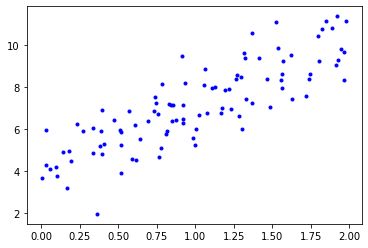

In [3]:
# Plot samples
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.plot(x, y,'b.') #b-> blue

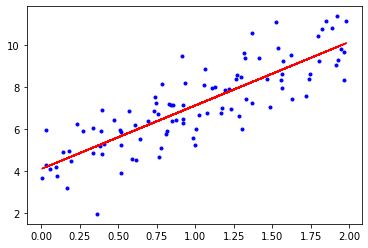

In [4]:
from sklearn.linear_model import LinearRegression

#using inverse Matrix (slow model)
lin_reg = LinearRegression() # 선형회귀모델 생성
lin_reg.fit(x, y) # x와 y데이터를 이용한 모델학습(fit)
y_predict = lin_reg.predict(x) #x를 이용한 예측값 생성(predict)

plt.plot(x, y,'b.')
plt.plot(x, y_predict,'r-') #'r:red, -:line'
plt.show()

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


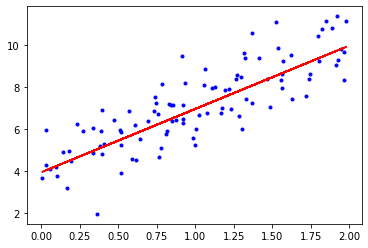

In [5]:
from sklearn.linear_model import SGDRegressor

# Create SGD model (fast model)
# max_iter->Reinforcement learning, eta0->GD step
sgd_clf = SGDRegressor(max_iter =5, eta0=0.1 ) 
sgd_clf.fit(x, y)

#Create predict with training data (x)
y_predict = sgd_clf.predict(x)

plt.plot(x, y,'b.')
plt.plot(x, y_predict,'r-') # predict line
plt.show()

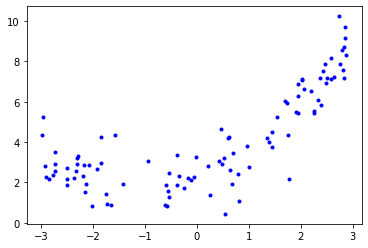

In [6]:
# polymial distribution
m = 100
x = 6 * np.random.rand(m, 1) - 3
x = np.sort(x, axis=0)
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)
plt.plot(x, y,'b.')


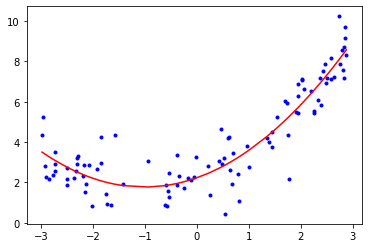

In [7]:
from sklearn.preprocessing import PolynomialFeatures

#2 degree polymial Model
poly_feat = PolynomialFeatures(degree =2, include_bias = False)
x_poly = poly_feat.fit_transform(x)
#print(x_poly)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
y_new = lin_reg.predict(x_poly)
plt.plot(x, y,'b.')

plt.plot(x, y_new,'r-')



In [15]:
# logistic regression (binary classifier)
from sklearn import datasets
iris = datasets.load_iris() # load iris data
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
#iris["data"] #check all keyword

In [17]:
x = iris["data"][:, 3:] #only petal width
y = (iris["target"] == 2).astype(np.int) #is virginica : 1(yes) or 0(no)

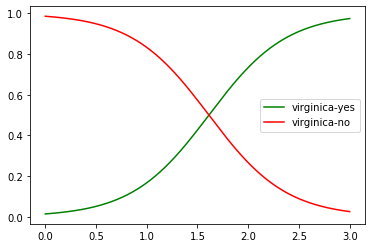

In [18]:
from sklearn.linear_model import LogisticRegression
#Create logistic Model
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x, y)

#plot 
x_axis = np.linspace(0,3,1000).reshape(-1, 1) #Create x
y_proba = log_reg.predict_proba(x_axis)# 
plt.plot(x_axis, y_proba[:, 1], "g-", label = "virginica-yes")
plt.plot(x_axis, y_proba[:, 0], "r-", label = "virginica-no")
plt.legend()
plt.show()

In [22]:
log_reg.predict([[1.7], [1.5] ,[1.0]]) # predict for petal length (1.7, 1.5, 1.1)

array([1, 0, 0])

In [26]:
from sklearn.metrics import confusion_matrix
x = iris["data"][:, (0,1,2,3)] # using all features
y = iris["target"]
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs",C = 100)
softmax_reg.fit(x, y)
pred_y = softmax_reg.predict(x)
conf_mat = confusion_matrix(pred_y, y)
conf_mat


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)